# 1. Import Libraries

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [365]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Import Dataset

In [366]:
df = pd.read_csv('datasets/cleaned_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWinStreak,HDef,HMid,HAtt,HOVR,ADef,AMid,AAtt,AOVR
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.40,4.5,8.5,D,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67
1,2012-09-01,swansea,sunderland,2.0,2.0,14.0,4.0,10.0,3.0,11.0,7.0,8.0,0.0,1.0,1.0,1.0,0.0,2.20,3.3,3.4,D,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,73,73,73.00,74,75,77,75.33
2,2012-09-22,west-ham,sunderland,1.0,1.0,20.0,4.0,11.0,2.0,12.0,10.0,10.0,1.0,2.0,1.0,0.0,0.0,2.10,3.3,3.6,D,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71,73,75,73.00,74,75,77,75.33
3,2012-10-06,city,sunderland,3.0,0.0,26.0,8.0,16.0,6.0,10.0,10.0,15.0,4.0,0.0,3.0,0.0,0.0,1.29,5.5,11.0,W,3,7,16.0,10.0,6.0,10.8,1.0,0.0,3.0,NaN,1.8,NaN,1.0,5.6,3.4,2.2,12.6,1.0,0.0,1.0,NaN,1.4,NaN,1.0,81,83,85,83.00,74,75,77,75.33
4,2012-10-27,stoke,sunderland,0.0,0.0,11.0,6.0,6.0,3.0,12.0,6.0,7.0,3.0,2.0,2.0,0.0,0.0,1.95,3.3,4.2,D,7,6,8.0,4.6,4.6,12.6,1.8,0.0,-1.0,NaN,1.0,NaN,0.0,9.0,4.8,4.6,14.4,1.4,0.0,-2.0,NaN,1.2,NaN,0.0,75,76,75,75.33,74,75,77,75.33


In [367]:
df = df[[
         'HDays', 'ADays',
         'HASL5M', 'HASTL5M', 
         'HACL5M', 'HAFL5M', 'HAYCL5M', 'HARCL5M',
         'HGDL5M', 'HGDL5HM', 'HAPL5M', 'HAPL5HM',
         'AASL5M', 'AASTL5M', 
         'AACL5M', 'AAFL5M', 'AAYCL5M', 'AARCL5M',
         'AGDL5M', 'AGDL5AM', 'AAPL5M','AAPL5AM', 
         'HDef', 'HMid', 'HAtt', 
         'HOVR',
         'ADef', 'AMid', 'AAtt', 
         'AOVR',
         'B365H', 'B365D', 'B365A',
         'Result'
        ]]
df.head()

,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,HDef,HMid,HAtt,ADef,AMid,AAtt,B365H,B365D,B365A,Result
0,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,74,75,78,1.40,4.5,8.5,D
1,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,73,73,74,75,77,2.20,3.3,3.4,D
2,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,73,75,74,75,77,2.10,3.3,3.6,D
3,3,7,16.0,10.0,6.0,10.8,1.0,0.0,3.0,NaN,1.8,NaN,5.6,3.4,2.2,12.6,1.0,0.0,1.0,NaN,1.4,NaN,81,83,85,74,75,77,1.29,5.5,11.0,W
4,7,6,8.0,4.6,4.6,12.6,1.8,0.0,-1.0,NaN,1.0,NaN,9.0,4.8,4.6,14.4,1.4,0.0,-2.0,NaN,1.2,NaN,75,76,75,74,75,77,1.95,3.3,4.2,D


In [368]:
df.shape

(3800, 32)

In [369]:
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,HDef,HMid,HAtt,ADef,AMid,AAtt,B365H,B365D,B365A,Result
0,8,8,12.8,6.2,6.6,11.0,1.4,0.0,1.0,8.0,1.4,2.0,9.4,4.0,4.6,10.8,2.0,0.0,-5.0,-4.0,0.4,0.6,75,77,78,74,75,77,1.67,3.75,5.25,L
1,4,5,9.8,5.0,4.2,12.4,1.2,0.0,2.0,0.0,1.8,2.0,12.2,6.8,4.8,11.8,2.2,0.0,-2.0,-2.0,0.8,1.0,73,72,72,74,75,77,2.10,3.30,3.60,W
2,6,4,13.6,8.0,5.8,8.2,1.4,0.0,4.0,5.0,2.4,2.4,15.6,9.4,7.0,11.4,1.6,0.0,-2.0,-3.0,0.8,0.8,83,82,86,74,75,77,1.20,6.50,15.00,W
3,10,7,14.4,8.0,6.2,10.2,0.6,0.0,4.0,2.0,2.0,1.6,14.4,9.0,7.4,11.0,1.2,0.0,-2.0,-2.0,0.8,0.8,72,70,73,74,75,77,2.00,3.50,3.75,L
4,3,4,18.4,10.8,7.4,8.0,1.2,0.0,4.0,6.0,1.8,2.0,12.0,7.8,5.2,11.2,1.4,0.0,2.0,-1.0,1.8,1.2,79,80,79,74,75,77,1.40,4.50,8.50,W


In [370]:
df.shape

(3553, 32)

# 2. Feature Selection

In [371]:
# from sklearn.preprocessing import MinMaxScaler
# from boruta import BorutaPy
# from sklearn.ensemble import RandomForestClassifier

In [372]:
# def ranking(ranks, names, order=1):
#     minmax = MinMaxScaler()
#     ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
#     ranks = map(lambda x: round(x,2), ranks)
#     return dict(zip(names, ranks))

# y = df.Result
# X = df.drop("Result", 1)
# colnames = X.columns

# # using the BorutaPy function
# rf = RandomForestClassifier(n_jobs = -1, class_weight="balanced_subsample", max_depth=5)
# feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
# feat_selector.fit(X.values, y.values.ravel())

# boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
# boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
# boruta_score = boruta_score.sort_values("Score", ascending = False)

# # boruta_score.head(15)

In [373]:
# features = boruta_score[boruta_score['Score'] == 1.0].Features.tolist()

# 2. Prepare Train and Test Set

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

In [375]:
# BORUTA
# X = df[['B365A', 'B365D', 'B365H', 'HOVR', 'HAtt', 'HMid', 'HDef', 'AOVR', 'ADef', 'AMid', 'AAtt', 'AASL5M', 'AASTL5M', 'AGDL5AM', 'HASL5M', 'HASTL5M', 'HGDL5HM']]
# y = df['Result']

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# standardization
sc = StandardScaler()

# X_train.iloc[:, 2:] = sc.fit_transform(X_train.iloc[:, 2:])
# X_test.iloc[:, 2:] = sc.transform(X_test.iloc[:, 2:])

X_train.iloc[:, :] = sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = sc.transform(X_test.iloc[:, :])

In [376]:
X_train.head()

,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,HDef,HMid,HAtt,ADef,AMid,AAtt,B365H,B365D,B365A
179,-0.807873,-1.217907,1.528165,0.809803,1.876837,-1.629089,-2.140422,-0.564428,0.821589,0.687866,0.930145,1.199237,-0.455348,-0.612582,0.289868,0.060067,-1.072409,-0.557219,-0.236197,-0.706111,-0.587771,-1.144002,1.470492,1.682630,1.507759,0.640511,0.149971,-0.086771,-0.706094,0.553491,0.926909
3415,-0.807873,-0.808286,0.026308,-0.543563,-0.563967,1.504950,-0.078827,1.198325,0.625473,-0.089436,0.062674,-0.250827,0.681156,0.220982,1.452707,0.854595,1.005391,2.997477,0.736096,0.279822,0.843140,0.287008,-0.995885,-0.359556,-0.538154,0.913179,0.911075,0.139263,-0.031529,-0.592812,-0.528284
1627,-0.807873,0.830194,0.809886,0.932837,0.927636,-1.629089,-0.422426,1.198325,1.213821,1.853819,0.640988,1.489250,0.807435,0.101901,1.969524,-1.415485,-2.111310,-0.557219,0.541638,0.477008,0.843140,1.145613,1.744534,2.193177,1.962406,2.276518,1.418477,1.947529,-0.411251,-0.234592,-0.369123
1101,-0.396703,-0.808286,-0.691972,-0.912663,-0.428367,0.721440,0.608371,-0.564428,-1.139570,-1.838366,-1.383109,-2.280917,-0.707905,-0.255340,-0.743765,-1.074973,-0.726109,1.220129,-0.041738,0.279822,-0.015407,0.573209,-0.721843,-0.614830,-0.992801,-0.722829,-0.357431,-0.312804,-0.411251,-0.306236,-0.369123
1118,0.425638,-1.217907,-0.234885,-0.666596,-0.835168,-0.957509,-1.796823,-0.564428,-0.355106,-1.449715,-0.804796,-1.120866,0.112904,-0.136260,-1.389787,-0.847965,-0.033509,-0.557219,-0.430655,-0.311738,0.556958,0.000806,-0.995885,-1.125376,-0.765477,0.095175,-0.103730,-0.312804,0.236510,-0.664456,-0.630603


In [377]:
y_train[0]

'L'

### Data Imbalance

In [378]:
# from imblearn.over_sampling import SMOTE

# print(y_train.value_counts())
# print()

# # SMOTE
# smt = SMOTE(sampling_strategy="auto", random_state=0, k_neighbors=5)

# # Fit the smote model with training data only
# X_train, y_train = smt.fit_resample(X_train, y_train)

# print(y_train.value_counts())
# print()

### Dimensionality Reduction Techniques

In [379]:
# # LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# # PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [380]:
# X_train[0]

In [381]:
# X_test[0]

## 4. Model Evaluation

In [382]:
import pickle

rf_classifier = pickle.load(open("models/rf_classifier.pkl", "rb"))
svc_classifier = pickle.load(open("models/svc_classifier.pkl", "rb"))
nb_classifier = pickle.load(open("models/nb_classifier.pkl", "rb"))
knn_classifier = pickle.load(open("models/knn_classifier.pkl", "rb"))
xgb_classifier = pickle.load(open("models/xgb_classifier.pkl", "rb"))
stack_classifier = pickle.load(open("models/stack_classifier.pkl", "rb"))

In [383]:
y_pred = rf_classifier.predict(X_test)
print('Accuracy on Test Set (Random Forest):', accuracy_score(y_test, y_pred))
print()

y_pred = svc_classifier.predict(X_test)
print('Accuracy on Test Set (Support Vector):', accuracy_score(y_test, y_pred))
print()

y_pred = nb_classifier.predict(X_test)
print('Accuracy on Test Set (Naive Bayes):', accuracy_score(y_test, y_pred))
print()

y_pred = knn_classifier.predict(X_test)
print('Accuracy on Test Set (KNN):', accuracy_score(y_test, y_pred))
print()

###
# for xgboost & stacking, have to encode test data
###
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_pred = xgb_classifier.predict(X_test)
print('Accuracy on Test Set (XGBoost):', accuracy_score(y_test, y_pred))
print()

y_pred = stack_classifier.predict(X_test)
print('Accuracy on Test Set (Stack Classifier):', accuracy_score(y_test, y_pred))
print()

Accuracy on Test Set (Random Forest): 0.4964838255977497

Accuracy on Test Set (Support Vector): 0.5358649789029536

Accuracy on Test Set (Naive Bayes): 0.5471167369901547

Accuracy on Test Set (KNN): 0.5288326300984529

Accuracy on Test Set (XGBoost): 0.5021097046413502

Accuracy on Test Set (Stack Classifier): 0.5021097046413502



## 3. Model Building

Accuracy on Test Set (Random Forest): 0.5372714486638537

Accuracy on Test Set (Support Vector): 0.5428973277074542

Accuracy on Test Set (Naive Bayes): 0.5386779184247539

Accuracy on Test Set (KNN): 0.5358649789029536

Accuracy on Test Set (XGBoost): 0.5133614627285513

Accuracy on Test Set (Stack Classifier): 0.5203938115330521

## 3.1 Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = rf_classifier.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


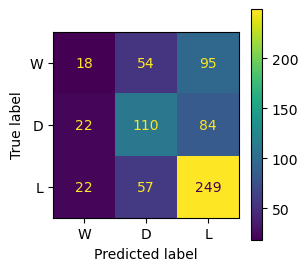

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show()

In [24]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = rf_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [25]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = rf_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.530239099859353
ROC score on Test Set: 0.6615373489190101

              precision    recall  f1-score   support

           D       0.29      0.11      0.16       167
           L       0.50      0.51      0.50       216
           W       0.58      0.76      0.66       328

    accuracy                           0.53       711
   macro avg       0.46      0.46      0.44       711
weighted avg       0.49      0.53      0.49       711



### Save Model

In [63]:
# get the best parameters
print(rf_classifier.best_params_)

# save model
pickle.dump(rf_classifier, open("models/rf_classifier.pkl", "wb"))

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 400}


## 3.2 SVM Classifier

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


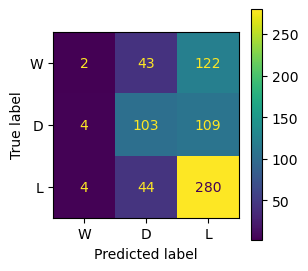

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [29]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = svc_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [30]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = svc_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5414908579465542
ROC score on Test Set: 0.6369939930448252

              precision    recall  f1-score   support

           D       0.20      0.01      0.02       167
           L       0.54      0.48      0.51       216
           W       0.55      0.85      0.67       328

    accuracy                           0.54       711
   macro avg       0.43      0.45      0.40       711
weighted avg       0.46      0.54      0.47       711



### Save Model

In [62]:
# get the best parameters
print(svc_classifier.best_params_)

# save model
pickle.dump(svc_classifier, open("models/svc_classifier.pkl", "wb"))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


## 3.3 Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Naive Bayes Classifier
# use GridSearchCV for hyperparameter tuning
classifier = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}
# nb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
nb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
nb_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = nb_classifier.predict(X_test)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


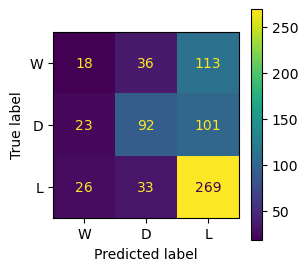

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [34]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = nb_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [35]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = nb_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5330520393811533
ROC score on Test Set: 0.6714574090003499

              precision    recall  f1-score   support

           D       0.27      0.11      0.15       167
           L       0.57      0.43      0.49       216
           W       0.56      0.82      0.66       328

    accuracy                           0.53       711
   macro avg       0.47      0.45      0.44       711
weighted avg       0.49      0.53      0.49       711



### Save Model

In [61]:
# get the best parameters
print(nb_classifier.best_params_)

# save model
pickle.dump(nb_classifier, open("models/nb_classifier.pkl", "wb"))

{'var_smoothing': 0.03195247505759212}


## 3.4 KNN Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN Classifier
# use GridSearchCV for hyperparameter tuning
classifier = KNeighborsClassifier(n_neighbors = 5)
param_grid = {
    'n_neighbors': list(range(3, 50)), 
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
knn_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = knn_classifier.predict(X_test)

Fitting 5 folds for each of 282 candidates, totalling 1410 fits


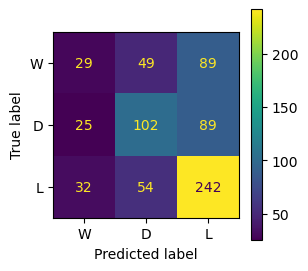

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [39]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = knn_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [40]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = knn_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5246132208157525
ROC score on Test Set: 0.659956244259431

              precision    recall  f1-score   support

           D       0.34      0.17      0.23       167
           L       0.50      0.47      0.48       216
           W       0.58      0.74      0.65       328

    accuracy                           0.52       711
   macro avg       0.47      0.46      0.45       711
weighted avg       0.50      0.52      0.50       711



### Save Model

In [60]:
# get the best parameters
print(knn_classifier.best_params_)

# save model
pickle.dump(knn_classifier, open("models/knn_classifier.pkl", "wb"))

{'metric': 'minkowski', 'n_neighbors': 49, 'weights': 'uniform'}


## 3.5 XGBoost Classifier

Highest Accuracy: 51.8 %

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# for xgboost, have to encode test data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


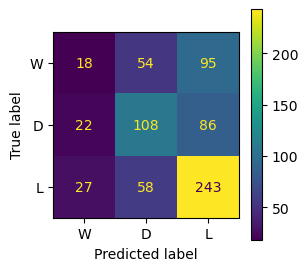

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [44]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = xgb_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [45]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = xgb_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5189873417721519
ROC score on Test Set: 0.6548445788499135

              precision    recall  f1-score   support

           0       0.27      0.11      0.15       167
           1       0.49      0.50      0.50       216
           2       0.57      0.74      0.65       328

    accuracy                           0.52       711
   macro avg       0.44      0.45      0.43       711
weighted avg       0.48      0.52      0.48       711



### Save Model

In [92]:
# get the best parameters
print(xgb_classifier.best_params_)

# save model
pickle.dump(xgb_classifier, open("models/xgb_classifier.pkl", "wb"))

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


## 3.6 Stacking Ensemble Classifier

Highest Accuracy: 50 %

In [52]:
from sklearn.ensemble import StackingClassifier

# create the Stacking Classifier
level0 = [
    ('rf', rf_classifier), 
    ('svm', svc_classifier),
    ('bayes', nb_classifier), 
    ('knn', knn_classifier)
]
stack_classifier = StackingClassifier(estimators = level0, final_estimator = RandomForestClassifier(), cv=5)

stack_classifier.fit(X_train, y_train)
y_pred = stack_classifier.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Fitting 5 folds for each of 282 candidates, totalling 1410 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Fitting 5 folds for each of 1000 candidates, totalling 5000 fi

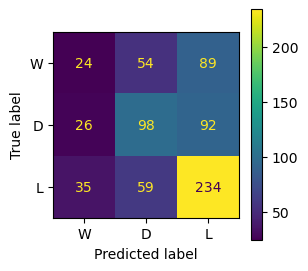

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['W', 'D', 'L'])
cmp.plot(ax=ax)

plt.show();

In [54]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = stack_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [55]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = stack_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5007032348804501
ROC score on Test Set: 0.642528368708899

              precision    recall  f1-score   support

           0       0.28      0.14      0.19       167
           1       0.46      0.45      0.46       216
           2       0.56      0.71      0.63       328

    accuracy                           0.50       711
   macro avg       0.44      0.44      0.43       711
weighted avg       0.47      0.50      0.47       711



### Save Model

In [91]:
# save model
pickle.dump(stack_classifier, open("models/stack_classifier.pkl", "wb"))